In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

EDA

In [10]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

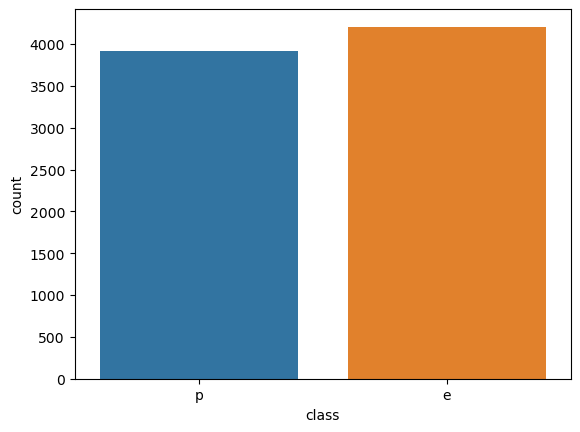

In [11]:
sns.countplot(data=df,x='class')
plt.show()

In [12]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [13]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


X & Y

In [15]:
input_data = df.drop('class',axis=1)
x=pd.get_dummies(input_data,drop_first=True)

In [16]:
y=df['class']

Train/Test split

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

Adaboost classifier model with default parameter

In [20]:
#modelling
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(x_train,y_train)
#prediction
ypred_train=model.predict(x_train)
prediction=model.predict(x_test)
#Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,prediction))
from sklearn.model_selection import cross_val_score
scores =cross_val_score(model,x,y,cv=5)
print("cross val",scores.mean())

1.0
1.0
cross val 0.9251425539977264


identifying best parameter for adaboost model using hyperparameter tuning

In [25]:
from sklearn.model_selection import GridSearchCV
#model/estimator
estimator = AdaBoostClassifier()
#paramater grid
param_grid={'n_estimators':list(range(1,51))}
#grid search
grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
#fit the data
grid.fit(x_train,y_train)
#best parameter for adaboost Model
grid.best_params_

{'n_estimators': 20}

In [26]:
grid.best_estimator_

AdaBoostClassifier(n_estimators=20)

feature important

In [28]:
grid.best_estimator_.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.05, 0.05, 0.05, 0.  , 0.  ,
       0.1 , 0.05, 0.  , 0.  , 0.  , 0.05, 0.15, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.05, 0.  , 0.1 , 0.  , 0.05, 0.  , 0.  , 0.1 ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [30]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                    index=x.columns,
                    columns=['Importance'])
important_features=feats[feats['Importance']>0]
important_features

,Importance
cap-color_w,0.05
bruises_t,0.05
odor_c,0.05
odor_f,0.05
odor_n,0.10
odor_p,0.05
gill-spacing_w,0.05
gill-size_n,0.15
stalk-surface-above-ring_k,0.05
stalk-surface-below-ring_y,0.05


In [31]:
imp_features_list = feats[feats['Importance']>0].index.to_list()
imp_features_list

['cap-color_w',
 'bruises_t',
 'odor_c',
 'odor_f',
 'odor_n',
 'odor_p',
 'gill-spacing_w',
 'gill-size_n',
 'stalk-surface-above-ring_k',
 'stalk-surface-below-ring_y',
 'stalk-color-below-ring_n',
 'spore-print-color_r',
 'spore-print-color_w',
 'population_c',
 'population_v']

In [34]:
# DROP UNIMPORTANT

x_imp=x[imp_features_list]
y=df['class']
x_train,x_test,y_train,y_test= train_test_split(x_imp,y,test_size=0.2,random_state=101)
#modelling
ada_bhp=AdaBoostClassifier(n_estimators=20)
ada_bhp.fit(x_train,y_train)
#prediction
ypred_train=ada_bhp.predict(x_train)
predictions=ada_bhp.predict(x_test)
#evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,predictions))
scores =  cross_val_score(ada_bhp,x,y,cv=5)
print(scores.mean())

1.0
1.0
0.9690940507768093


confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[851,   0],
       [  0, 774]], dtype=int64)

classification report

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       851
           p       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



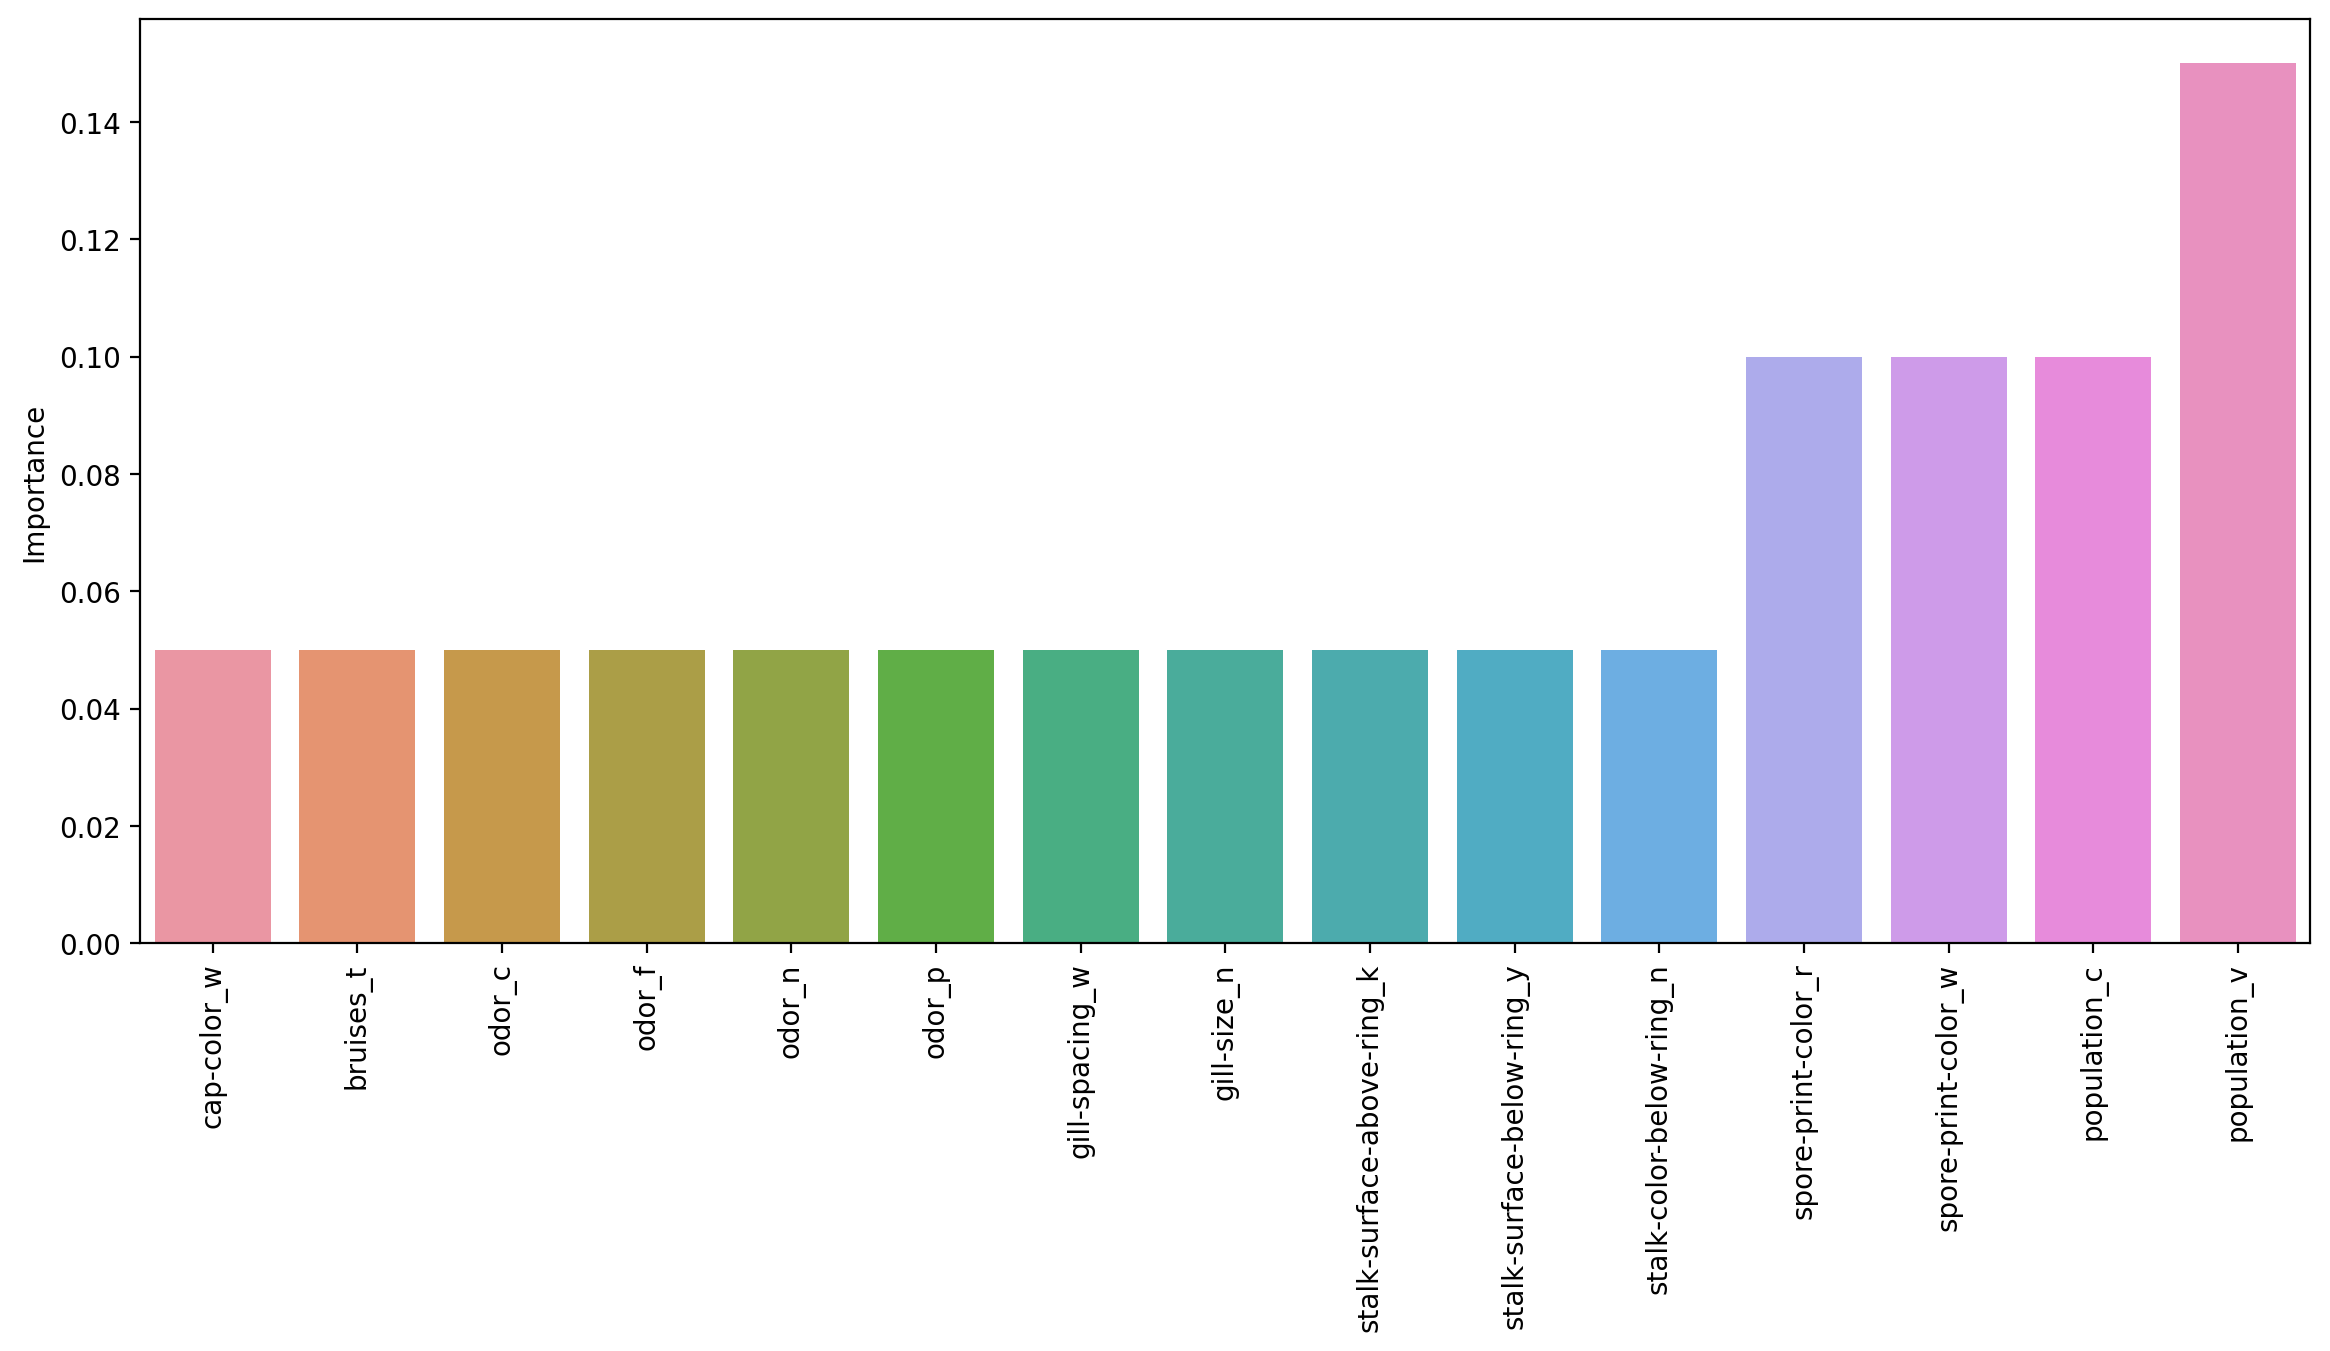

In [41]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=important_features.sort_values('Importance'),
           x=important_features.index,
           y='Importance')

plt.xticks(rotation=90)
plt.show()